# Industry Project Yelp; Correlation

**Import and load data and libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("./Yelp Restaurant Reviews.csv")
keyword_df = pd.read_csv("./keyword_df.csv")

In [3]:
df

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...
...,...,...,...,...
19891,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,7/17/2021,Had the chocolate cannoli! The filling was ric...
19892,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/21/2019,Love apricot croissant! I bought it at 4:00 PM...
19893,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,10/12/2019,Line was about 25 people long. It went fast! T...
19894,https://www.yelp.com/biz/la-pasticceria-las-vegas,5,4/11/2021,Its hard not to order everything when I come h...


In [4]:
keyword_df

,Yelp URL,Rating,Date,Review Text,Year_Month,Year
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew! I got t...,2016-07,2016
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,2015-06,2015
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,2,2019-07-26,Went here for the 1st time tonight. I ordered ...,2019-07,2019
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-18,Best ice cream in the area! I love their featu...,2018-05,2018
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-05,Delicious ice cream. Best soft serve I've ever...,2018-05,2018
...,...,...,...,...,...,...
7053,https://www.yelp.com/biz/la-pasticceria-las-vegas,1,2021-10-22,We came here looking to try wonderful desserts...,2021-10,2021
7054,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-11-08,Out of all the food kiosks that were in Eataly...,2019-11,2019
7055,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-06-30,There's an endless selection of Italian food o...,2019-06,2019
7056,https://www.yelp.com/biz/la-pasticceria-las-vegas,4,2019-10-21,Love apricot croissant! I bought it at 4:00 PM...,2019-10,2019


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB


In [6]:
keyword_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     7058 non-null   object
 1   Rating       7058 non-null   int64 
 2   Date         7058 non-null   object
 3   Review Text  7058 non-null   object
 4   Year_Month   7058 non-null   object
 5   Year         7058 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 331.0+ KB


**Remove numbers and marks, and check what/how many words in the review.**

In [7]:
word_df = df.copy()
word_df["Review Text"] = word_df["Review Text"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")
word_df.head()

C:\Users\yumem\AppData\Local\Temp\ipykernel_44252\594792672.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  word_df["Review Text"] = word_df["Review Text"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")


,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day Staff was very ...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew I got th...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

In [9]:
# 1. Instantiate 
bagofwords = CountVectorizer(tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')

# 2. Fit 
bagofwords.fit(word_df["Review Text"])

# 3. Transform
df_transformed = bagofwords.transform(word_df["Review Text"])
df_transformed.shape

C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti'

(19896, 14818)

In [11]:
# All words in the reviews
review_words = bagofwords.get_feature_names()
list(review_words)

['',
 'aa',
 'aaa',
 'aaaaa',
 'aaaaaaahhhhhh',
 'aaaaaamaz',
 'aaaaaand',
 'aaaaand',
 'aaaah',
 'aaaahhhh',
 'aaaand',
 'aaab',
 'aaah',
 'aaamaz',
 'aaamazinggggg',
 'aaand',
 'aad',
 'aaf',
 'aahahaha',
 'aahhhhhmaz',
 'aaliyah',
 'aaron',
 'ab',
 'aback',
 'abandon',
 'abari',
 'abbazaba',
 'abbi',
 'abc',
 'abey',
 'abid',
 'abil',
 'abita',
 'abject',
 'abjectli',
 'abl',
 'ablw',
 'aboard',
 'abod',
 'abol',
 'abomin',
 'abound',
 'abov',
 'abroad',
 'abrupt',
 'abruptli',
 'absenc',
 'absent',
 'absente',
 'absinth',
 'absolut',
 'absolutley',
 'absorb',
 'absoulti',
 'abstract',
 'absurd',
 'absurdli',
 'abt',
 'abuelita',
 'abund',
 'abundantli',
 'abus',
 'abuzz',
 'abysm',
 'ac',
 'acai',
 'accb',
 'accent',
 'accentu',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'acclaim',
 'accolad',
 'accomd',
 'accommod',
 'accomod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'accordion',
 'accost',
 'account',
 'accoutr',
 'accross',
 'accru',
 'accumul',

In [14]:
# Dataframe of tokens
bagofword_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=df_transformed.toarray())
display(bagofword_df)

,,aa,aaa,aaaaa,aaaaaaahhhhhh,aaaaaamaz,aaaaaand,aaaaand,aaaah,aaaahhhh,...,zombi,zone,zoo,zoom,zootopia,zoreo,zr,zuul,zykwn,zzqi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Take rows with keywords in the review

In [15]:
# Change or add keywoeds HERE
keywords = ["receipt", "pay", "checkout", "fast", "slow", "wait", "delay", "leave", 
            "waiter", "waitress", "find", "minute", "forever", "quick", "swift", "quicker",
            "payment", "bill", "cashier", "faster", "slower", "quicker", "smoothly", "left", "search", "look", 
            "second", "paid"]

In [17]:
# Convert keywords into token

# 1. Instantiate 
bagofwords_key = CountVectorizer(tokenizer = lambda x: [stemmer.stem(i) for i in x.split(', ')], 
                             stop_words='english')

# 2. Fit 
bagofwords_key.fit(keywords)

keywords_bagofword = bagofwords_key.get_feature_names()
keywords_bagofword

['cashier',
 'checkout',
 'delay',
 'fast',
 'faster',
 'forev',
 'leav',
 'left',
 'look',
 'minut',
 'paid',
 'pay',
 'payment',
 'quick',
 'quicker',
 'receipt',
 'search',
 'second',
 'slow',
 'slower',
 'smoothli',
 'swift',
 'wait',
 'waiter',
 'waitress']

In [18]:
# Check keywords which is not in the review

for word in keywords_bagofword:
    if word in review_words:
        pass
    else:
        print(word)

swift


In [19]:
# Remove keyword which is not in the review

keywords_bagofword.remove("swift")

In [20]:
keywords_bagofword

['cashier',
 'checkout',
 'delay',
 'fast',
 'faster',
 'forev',
 'leav',
 'left',
 'look',
 'minut',
 'paid',
 'pay',
 'payment',
 'quick',
 'quicker',
 'receipt',
 'search',
 'second',
 'slow',
 'slower',
 'smoothli',
 'wait',
 'waiter',
 'waitress']

In [21]:
len(keywords_bagofword)

24

### Convert the review with keywords into tokens

In [22]:
keyword_word_df = keyword_df.copy()
keyword_word_df["Review Text"] = keyword_word_df["Review Text"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")
keyword_word_df.head()

C:\Users\yumem\AppData\Local\Temp\ipykernel_44252\3767233419.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  keyword_word_df["Review Text"] = keyword_word_df["Review Text"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")


,Yelp URL,Rating,Date,Review Text,Year_Month,Year
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,2016-07-28,This was great service and a fun crew I got th...,2016-07,2016
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2015-06-23,This is one of my favorite places to get ice c...,2015-06,2015
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,2,2019-07-26,Went here for the st time tonight I ordered a ...,2019-07,2019
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-18,Best ice cream in the area I love their featur...,2018-05,2018
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,2018-05-05,Delicious ice cream Best soft serve I ve ever ...,2018-05,2018


In [23]:
# 1. Instantiate 
bagofwords_keyword = CountVectorizer(tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')

# 2. Fit 
bagofwords_keyword.fit(keyword_word_df["Review Text"])

# 3. Transform
keyword_df_transformed = bagofwords_keyword.transform(keyword_word_df["Review Text"])
keyword_df_transformed.shape

C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\yumem\anaconda3\envs\deeplearning\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti'

(7058, 11334)

In [25]:
# All words in the reviews with keywords
review_keyword_words = bagofwords_keyword.get_feature_names()
review_keyword_words

['',
 'aa',
 'aaa',
 'aaaaa',
 'aaaaaamaz',
 'aaaaaand',
 'aaaahhhh',
 'aaaand',
 'aaab',
 'aaah',
 'aaf',
 'aaron',
 'ab',
 'aback',
 'abandon',
 'abari',
 'abbazaba',
 'abbi',
 'abc',
 'abil',
 'abjectli',
 'abl',
 'ablw',
 'aboard',
 'abomin',
 'abov',
 'abroad',
 'abruptli',
 'absenc',
 'absent',
 'absente',
 'absolut',
 'absolutley',
 'absorb',
 'absoulti',
 'abstract',
 'absurd',
 'absurdli',
 'abt',
 'abuelita',
 'abund',
 'abundantli',
 'abus',
 'abuzz',
 'abysm',
 'ac',
 'acai',
 'accent',
 'accentu',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'accolad',
 'accomd',
 'accommod',
 'accomod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'accost',
 'account',
 'accoutr',
 'accur',
 'accuraci',
 'accus',
 'accustom',
 'acd',
 'ace',
 'ach',
 'achiev',
 'acid',
 'acknowledg',
 'acoust',
 'acquaint',
 'acquir',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'addit',
 'address',
 'adefaa',
 'adept',
 'adequ',
 'adesert',
 'adf'

In [27]:
# Dataframe of tokens
bagofword_keyword_df = pd.DataFrame(columns=bagofwords_keyword.get_feature_names(), data=keyword_df_transformed.toarray())
display(bagofword_keyword_df)

,,aa,aaa,aaaaa,aaaaaamaz,aaaaaand,aaaahhhh,aaaand,aaab,aaah,...,ziplock,zippade,zirconia,zit,zombi,zone,zoo,zootopia,zr,zykwn
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7054,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7055,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
bagofword_keyword_df = bagofword_keyword_df.loc[:,keywords_bagofword]
bagofword_keyword_df

,cashier,checkout,delay,fast,faster,forev,leav,left,look,minut,...,quicker,receipt,search,second,slow,slower,smoothli,wait,waiter,waitress
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,0
7054,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7055,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
corr_keyword_df = pd.concat([keyword_df["Rating"], bagofword_keyword_df], axis=1)

In [30]:
corr_keyword_df

,Rating,cashier,checkout,delay,fast,faster,forev,leav,left,look,...,quicker,receipt,search,second,slow,slower,smoothli,wait,waiter,waitress
0,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,1,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,2,0,0
7054,4,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7055,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7056,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Correlation between Rating and the Keywords: Keyword dataset

In [31]:
corr_keyword_df.corr()

,Rating,cashier,checkout,delay,fast,faster,forev,leav,left,look,...,quicker,receipt,search,second,slow,slower,smoothli,wait,waiter,waitress
Rating,1.000000,-0.138131,-0.013918,0.005831,0.106577,-0.024950,-0.005313,-0.017560,-0.116350,-0.060398,...,0.003812,-0.098975,0.021074,-0.012701,-0.079742,0.000572,0.010912,-0.057849,-0.019578,-0.016160
cashier,-0.138131,1.000000,0.071144,0.004126,-0.011636,0.039718,0.012192,-0.007810,0.052634,-0.028494,...,0.040188,0.117328,-0.020479,0.044379,0.052726,0.027552,-0.007898,0.063894,-0.001390,0.004969
checkout,-0.013918,0.071144,1.000000,-0.002336,0.016098,-0.004383,0.008950,-0.006470,-0.001106,-0.008248,...,-0.002781,-0.004595,-0.006304,-0.000528,0.001765,-0.002336,0.048334,0.014251,0.030716,-0.002236
delay,0.005831,0.004126,-0.002336,1.000000,-0.011235,-0.003196,0.020449,0.027814,0.011632,-0.020616,...,-0.002028,0.025211,-0.004597,-0.011334,-0.007138,-0.001703,-0.001773,0.018025,-0.001975,-0.001630
fast,0.106577,-0.011636,0.016098,-0.011235,1.000000,-0.014715,-0.020251,-0.028111,-0.044660,-0.095773,...,-0.002918,-0.000814,-0.024439,-0.028791,-0.025318,0.013654,-0.011694,-0.077818,0.010588,-0.010756
faster,-0.024950,0.039718,-0.004383,-0.003196,-0.014715,1.000000,0.016321,0.006283,0.002124,-0.023887,...,0.032105,-0.006289,-0.008627,-0.003057,0.014634,-0.003196,-0.003327,0.065274,-0.003707,-0.003060
forev,-0.005313,0.012192,0.008950,0.020449,-0.020251,0.016321,1.000000,0.009907,-0.011368,-0.028918,...,-0.006438,-0.001791,-0.008482,-0.017615,-0.000046,-0.005407,-0.005628,-0.006078,-0.006272,-0.005177
leav,-0.017560,-0.007810,-0.006470,0.027814,-0.028111,0.006283,0.009907,1.000000,0.015288,-0.067655,...,-0.001889,0.036085,-0.013550,-0.019773,-0.010937,-0.010633,0.001246,-0.045620,0.020098,-0.010180
left,-0.116350,0.052634,-0.001106,0.011632,-0.044660,0.002124,-0.011368,0.015288,1.000000,-0.011756,...,0.015468,0.036718,-0.014570,-0.013954,0.002448,-0.011469,0.010259,-0.017241,-0.005995,-0.010980
look,-0.060398,-0.028494,-0.008248,-0.020616,-0.095773,-0.023887,-0.028918,-0.067655,-0.011756,1.000000,...,-0.017330,0.010006,-0.018996,-0.064631,-0.072376,-0.009769,-0.016683,-0.151468,-0.023340,0.003391


<AxesSubplot: >

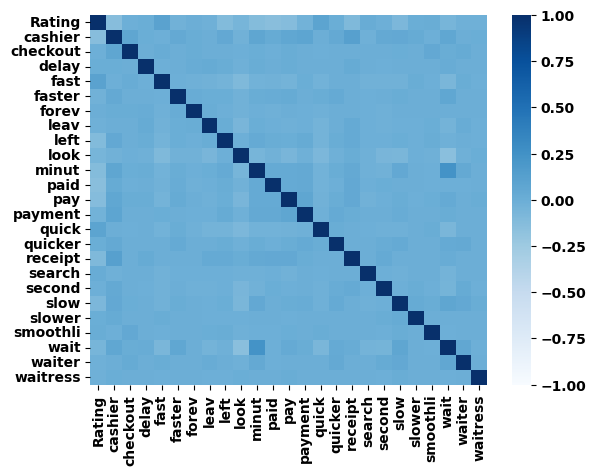

In [32]:
import seaborn as sns
sns.heatmap(corr_keyword_df.corr(), vmax=1, vmin=-1, center=0, cmap="Blues")

In [33]:
corr_keyword_df.corr()["wait"]

Rating     -0.057849
cashier     0.063894
checkout    0.014251
delay       0.018025
fast       -0.077818
faster      0.065274
forev      -0.006078
leav       -0.045620
left       -0.017241
look       -0.151468
minut       0.238224
paid       -0.011929
pay         0.032358
payment     0.013399
quick      -0.075078
quicker     0.038342
receipt     0.018082
search     -0.043797
second     -0.048255
slow        0.074002
slower     -0.000877
smoothli   -0.011886
wait        1.000000
waiter      0.055287
waitress   -0.008654
Name: wait, dtype: float64

In [34]:
corr_keyword_df.corr().min()

Rating     -0.146851
cashier    -0.138131
checkout   -0.013918
delay      -0.020616
fast       -0.095773
faster     -0.024950
forev      -0.028918
leav       -0.067655
left       -0.116350
look       -0.151468
minut      -0.123801
paid       -0.146851
pay        -0.130798
payment    -0.032805
quick      -0.083959
quicker    -0.017330
receipt    -0.098975
search     -0.043797
second     -0.064631
slow       -0.079742
slower     -0.011627
smoothli   -0.016683
wait       -0.151468
waiter     -0.023340
waitress   -0.016160
dtype: float64

<AxesSubplot: >

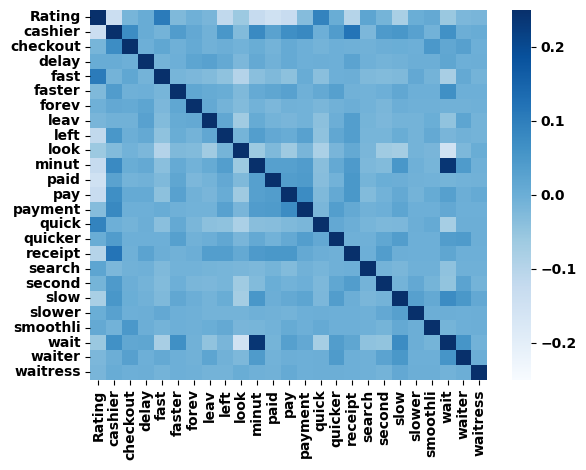

In [48]:
import seaborn as sns
sns.heatmap(corr_keyword_df.corr(), vmax=0.25, vmin=-0.25, center=0, cmap="Blues")

In [36]:
keyword_rating_corr = corr_keyword_df.corr()["Rating"]
keyword_rating_corr = keyword_rating_corr.drop("Rating")
keyword_rating_corr

cashier    -0.138131
checkout   -0.013918
delay       0.005831
fast        0.106577
faster     -0.024950
forev      -0.005313
leav       -0.017560
left       -0.116350
look       -0.060398
minut      -0.123801
paid       -0.146851
pay        -0.130798
payment    -0.032805
quick       0.090524
quicker     0.003812
receipt    -0.098975
search      0.021074
second     -0.012701
slow       -0.079742
slower      0.000572
smoothli    0.010912
wait       -0.057849
waiter     -0.019578
waitress   -0.016160
Name: Rating, dtype: float64

<BarContainer object of 24 artists>

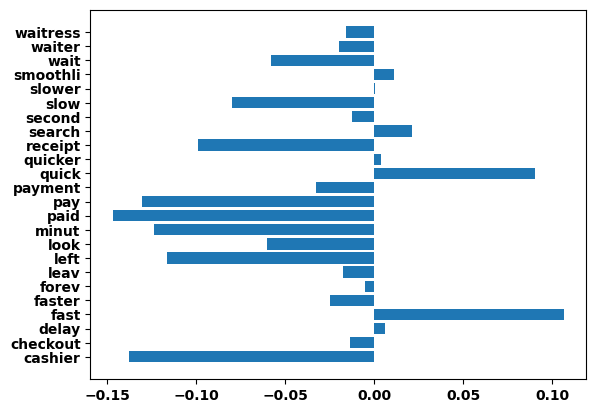

In [37]:
plt.barh(keyword_rating_corr.index, keyword_rating_corr.values)

### Correlation between Rating and the Keywords: Original dataset

In [38]:
bagofword_df

,,aa,aaa,aaaaa,aaaaaaahhhhhh,aaaaaamaz,aaaaaand,aaaaand,aaaah,aaaahhhh,...,zombi,zone,zoo,zoom,zootopia,zoreo,zr,zuul,zykwn,zzqi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
bagofword_df2 = bagofword_df.loc[:, keywords_bagofword]
bagofword_df2

,cashier,checkout,delay,fast,faster,forev,leav,left,look,minut,...,quicker,receipt,search,second,slow,slower,smoothli,wait,waiter,waitress
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19893,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
corr_original_df = pd.concat([df["Rating"], bagofword_df2], axis=1)
corr_original_df

,Rating,cashier,checkout,delay,fast,faster,forev,leav,left,look,...,quicker,receipt,search,second,slow,slower,smoothli,wait,waiter,waitress
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19892,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19893,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19894,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
corr_original_df.corr()

,Rating,cashier,checkout,delay,fast,faster,forev,leav,left,look,...,quicker,receipt,search,second,slow,slower,smoothli,wait,waiter,waitress
Rating,1.000000,-0.109603,-0.015534,-0.000972,0.036900,-0.025061,-0.018441,-0.040225,-0.104915,-0.099794,...,-0.003186,-0.073405,0.000834,-0.038947,-0.070978,-0.004382,0.002128,-0.095623,-0.018202,-0.015028
cashier,-0.109603,1.000000,0.076943,0.008920,0.019966,0.048288,0.027288,0.022046,0.082650,0.040909,...,0.045488,0.125332,-0.007158,0.074348,0.071771,0.032082,-0.002770,0.119950,0.004239,0.009548
checkout,-0.015534,0.076943,1.000000,-0.000827,0.025412,-0.001550,0.013645,0.002875,0.008816,0.013181,...,-0.000985,-0.001625,-0.002225,0.009269,0.007996,-0.000827,0.049821,0.032400,0.032407,-0.000792
delay,-0.000972,0.008920,-0.000827,1.000000,-0.003891,-0.001131,0.023794,0.033936,0.018565,-0.003400,...,-0.000718,0.027300,-0.001623,-0.003924,-0.002507,-0.000604,-0.000628,0.030524,-0.000700,-0.000578
fast,0.036900,0.019966,0.025412,-0.003891,1.000000,-0.001083,0.002686,0.016405,0.003963,0.013125,...,0.005577,0.013110,-0.004741,0.018558,0.004902,0.020409,-0.004050,0.023355,0.018543,-0.003726
faster,-0.025061,0.048288,-0.001550,-0.001131,-0.001083,1.000000,0.022700,0.018725,0.015598,0.006808,...,0.034467,-0.002222,-0.003042,0.010398,0.023012,-0.001131,-0.001177,0.085535,-0.001312,-0.001083
forev,-0.018441,0.027288,0.013645,0.023794,0.002686,0.022700,1.000000,0.030862,0.011771,0.021670,...,-0.002270,0.005035,0.000927,0.005444,0.014360,-0.001907,-0.001985,0.039607,-0.002211,-0.001825
leav,-0.040225,0.022046,0.002875,0.033936,0.016405,0.018725,0.030862,1.000000,0.058768,0.032533,...,0.006145,0.048451,0.004845,0.024756,0.017284,-0.003692,0.008208,0.046933,0.027453,-0.003534
left,-0.104915,0.082650,0.008816,0.018565,0.003963,0.015598,0.011771,0.058768,1.000000,0.088264,...,0.023678,0.049940,0.005252,0.033639,0.032351,-0.003969,0.017520,0.078611,0.002525,-0.003800
look,-0.099794,0.040909,0.013181,-0.003400,0.013125,0.006808,0.021670,0.032533,0.088264,1.000000,...,0.002385,0.038329,0.023413,0.041103,-0.001724,0.006269,0.000719,0.072692,-0.003433,0.017364


<AxesSubplot: >

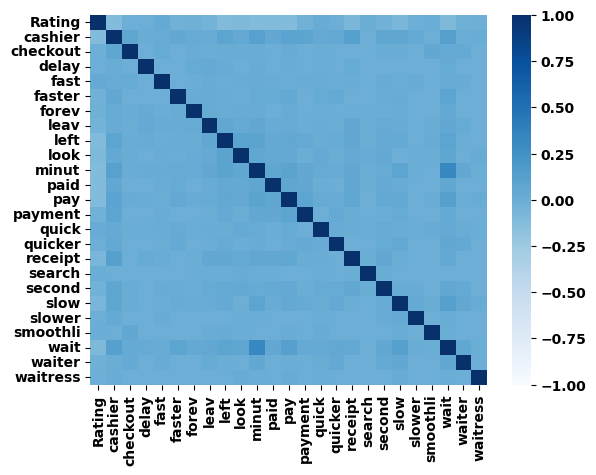

In [42]:
sns.heatmap(corr_original_df.corr(), vmax=1, vmin=-1, center=0, cmap="Blues")

In [43]:
corr_original_df.corr()["wait"]

Rating     -0.095623
cashier     0.119950
checkout    0.032400
delay       0.030524
fast        0.023355
faster      0.085535
forev       0.039607
leav        0.046933
left        0.078611
look        0.072692
minut       0.321398
paid        0.053651
pay         0.123517
payment     0.032920
quick       0.036660
quicker     0.051559
receipt     0.044305
search     -0.001006
second      0.050219
slow        0.125406
slower      0.013473
smoothli    0.004125
wait        1.000000
waiter      0.066405
waitress    0.005849
Name: wait, dtype: float64

In [44]:
corr_original_df.corr().min()

Rating     -0.115618
cashier    -0.109603
checkout   -0.015534
delay      -0.003924
fast       -0.004741
faster     -0.025061
forev      -0.018441
leav       -0.040225
left       -0.104915
look       -0.099794
minut      -0.115445
paid       -0.115618
pay        -0.114419
payment    -0.028199
quick      -0.006335
quicker    -0.003238
receipt    -0.073405
search     -0.008571
second     -0.038947
slow       -0.070978
slower     -0.004382
smoothli   -0.005023
wait       -0.095623
waiter     -0.018202
waitress   -0.015028
dtype: float64

<AxesSubplot: >

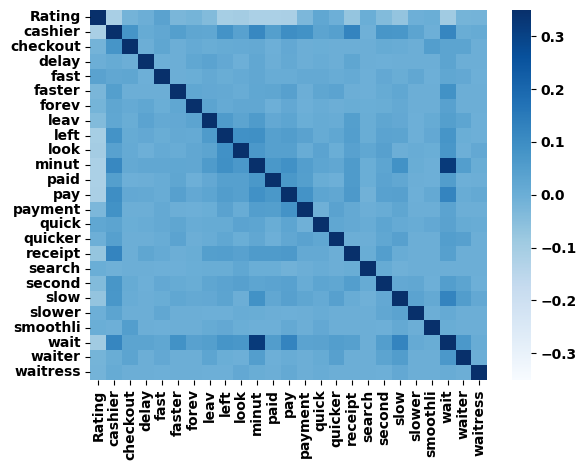

In [49]:
sns.heatmap(corr_original_df.corr(), vmax=0.35, vmin=-0.35, center=0, cmap="Blues")

In [46]:
original_rating_corr = corr_original_df.corr()["Rating"]
original_rating_corr = original_rating_corr.drop("Rating")
original_rating_corr

cashier    -0.109603
checkout   -0.015534
delay      -0.000972
fast        0.036900
faster     -0.025061
forev      -0.018441
leav       -0.040225
left       -0.104915
look       -0.099794
minut      -0.115445
paid       -0.115618
pay        -0.114419
payment    -0.028199
quick       0.022894
quicker    -0.003186
receipt    -0.073405
search      0.000834
second     -0.038947
slow       -0.070978
slower     -0.004382
smoothli    0.002128
wait       -0.095623
waiter     -0.018202
waitress   -0.015028
Name: Rating, dtype: float64

<BarContainer object of 24 artists>

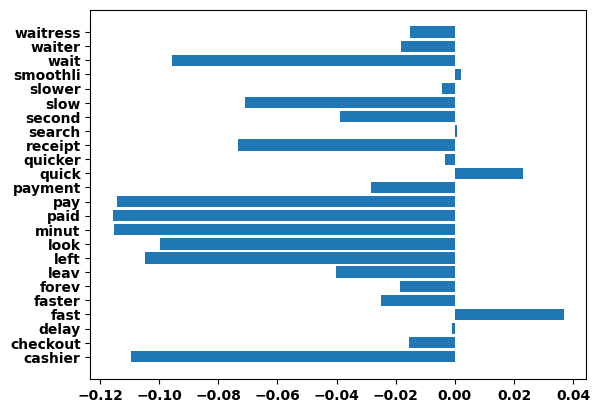

In [47]:
plt.barh(original_rating_corr.index, original_rating_corr.values)

Ckeck the correlation coefficient of all token's in original dataset.

In [50]:
corr_original_df2 = pd.concat([df["Rating"], bagofword_df], axis=1)
corr_original_df2

,Rating,,aa,aaa,aaaaa,aaaaaaahhhhhh,aaaaaamaz,aaaaaand,aaaaand,aaaah,...,zombi,zone,zoo,zoom,zootopia,zoreo,zr,zuul,zykwn,zzqi
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19892,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19893,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19894,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Correlation between "Rating" and all tokens
entire_rating_corr = corr_original_df2.corr()["Rating"]

In [54]:
# Drop "Rating" from the coefficient Series
entire_rating_corr = entire_rating_corr.drop("Rating")

In [72]:
# Saving the coefficient Series
entire_rating_corr.to_pickle('rating_corr_coeff.pkl')

In [52]:
# Check the minimun coefficient
entire_rating_corr.min()

-0.2281984956353197

In [55]:
# Ckeck the maximum coefficient
entire_rating_corr.max()

0.15983925693369577

In [71]:
# Positively correlating words
entire_rating_corr[entire_rating_corr > 0.1]

amaz        0.154849
best        0.141197
delici      0.159839
favorit     0.128107
friendli    0.104934
love        0.134085
perfect     0.102140
Name: Rating, dtype: float64

In [70]:
# Negatively correlating words
entire_rating_corr[entire_rating_corr < -0.1]

anoth        -0.101763
ask          -0.174812
attitud      -0.111604
aw           -0.122076
bad          -0.158325
becaus       -0.119071
better       -0.162328
bland        -0.123731
cake         -0.122889
cashier      -0.109603
charg        -0.108693
counter      -0.105131
custom       -0.129513
did          -0.104969
didn         -0.168795
disappoint   -0.225704
disgust      -0.118944
dri          -0.228198
employe      -0.115826
excit        -0.112175
expect       -0.149041
horribl      -0.163435
hype         -0.146440
instead      -0.102900
just         -0.129054
lack         -0.120509
left         -0.104915
like         -0.135034
manag        -0.121937
mayb         -0.127707
mediocr      -0.113969
minut        -0.115445
money        -0.187157
noth         -0.164144
ok           -0.139798
okay         -0.119006
onli         -0.103719
order        -0.177958
overpr       -0.144436
paid         -0.115618
pay          -0.114419
price        -0.112559
rude         -0.178106
said       